<a href="https://colab.research.google.com/github/Kobe97915/Kobe/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load and Inspect the Dataset**

We'll use Keras to load the IMDb dataset, which splits the data into training and testing sets automatically.

In [9]:
from tensorflow.keras.datasets import imdb
import numpy as np # Import the numpy library

# Load dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Display sample size and label distribution
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")
print("Label distribution:", dict(zip(*np.unique(y_train, return_counts=True)))) # Now np is defined and can be used

Training samples: 25000, Testing samples: 25000
Label distribution: {0: 12500, 1: 12500}


**Preprocessing**

IMDb reviews are provided as sequences of word indices (integer-encoded). We’ll need to:

Pad sequences: Ensure each review has the same length by padding.
Convert indices back to text (for analysis).

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Pad sequences to a maximum length (e.g., 500 words)
max_len = 500
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Optional: Decode review to text for inspection
word_index = imdb.get_word_index()
reverse_word_index = {value: key for (key, value) in word_index.items()}
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in X_train[0]])
print("Decoded review:", decoded_review)


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Decoded review: ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the fil

 **Build a Simple LSTM Model for Sentiment Analysis**

An LSTM model is effective for text data because it captures sequential dependencies. We’ll use an embedding layer, an LSTM layer, and a dense output layer for binary classification.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define model architecture
model = Sequential([
    Embedding(input_dim=10000, output_dim=32, input_length=max_len),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

** Train the Model**

We'll train the model on the IMDb dataset and validate it using the test set.

In [12]:
# Training the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 198s 498ms/step - accuracy: 0.6778 - loss: 0.5776 - val_accuracy: 0.8337 - val_loss: 0.3868
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 202s 498ms/step - accuracy: 0.8608 - loss: 0.3415 - val_accuracy: 0.8529 - val_loss: 0.3552
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 239s 593ms/step - accuracy: 0.8802 - loss: 0.3054 - val_accuracy: 0.8376 - val_loss: 0.3957
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 226s 500ms/step - accuracy: 0.8795 - loss: 0.2975 - val_accuracy: 0.8384 - val_loss: 0.3860
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 199s 492ms/step - accuracy: 0.9041 - loss: 0.2443 - val_accuracy: 0.8473 - val_loss: 0.3723


** Evaluate the Model**

After training, check the model’s accuracy and visualize the loss/accuracy curves.

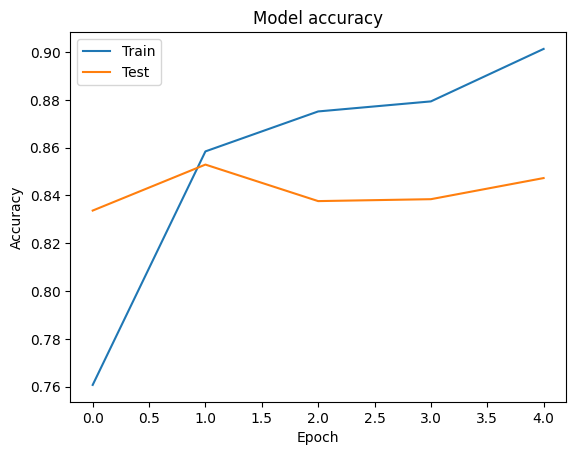

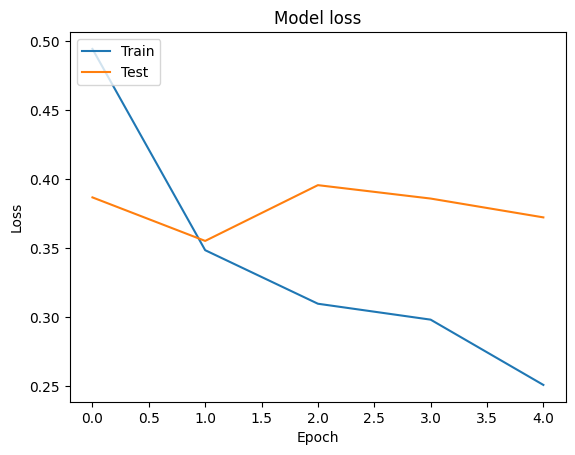

782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.8493 - loss: 0.3710
Test accuracy: 0.847


In [13]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")


**Making Predictions**

In [14]:
import numpy as np

# Sample review
sample_review = "The movie was amazing and the acting was superb!"
encoded_review = [1 if word in word_index else 0 for word in sample_review.split()]
padded_review = pad_sequences([encoded_review], maxlen=max_len)
prediction = model.predict(padded_review)

print("Prediction (0=negative, 1=positive):", int(np.round(prediction[0][0])))



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
Prediction (0=negative, 1=positive): 0
